시계열 모형 종류
===
AR - 자기회귀 모형
---
* AR(Autoregressive) 모델은 자기회귀 모델로 자기상관성을 시계열 모델로 구성한 것.
* 예측하고 싶은 특정 변수의 과거 자신의 데이터와 선형 결합을 통해 특정 시점 이후 미래값을 예측하는 모델.
* 이름 그대로 이전 자신의 데이터가 이후 자신의 미래 관측값에 영향을 끼친다는 것을 기반으로 나온 모델.
* AR(1) 에 적용하기 위해선 $1<ϕ_1<1$ 조건 이 필요.

### statsmodels의 ArmaProcess
* statsmodels.tsa.arima_process.ArmaProcess
<details>
<summary> Parameters 펼치기/접기</summary>
<div markdown="1">

**ar** : [array_like](https://numpy.org/doc/stable/glossary.html#term-array_like "(in NumPy v1.22)")

Coefficient for autoregressive lag polynomial, including zero lag. Must be entered using the signs from the lag polynomial representation. See the notes for more information about the sign.

**ma** : [array_like](https://numpy.org/doc/stable/glossary.html#term-array_like "(in NumPy v1.22)")

Coefficient for moving-average lag polynomial, including zero lag.

**nobs** : [`int`](https://docs.python.org/3/library/functions.html#int "(in Python v3.10)"),  `optional`

Length of simulated time series. Used, for example, if a sample is generated. See example.

</div>
</details>

</br>

### AR 모형 실습

In [3]:
# AR 모형 실습
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples(ar,ma,nobs) :
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples

# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
# drift → 절편 존재
def gen_random_walk_w_drift(nobs, drift) :
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1,nobs) :
        y[t] = drift + 1*y[t-1] + e[t]
        return y

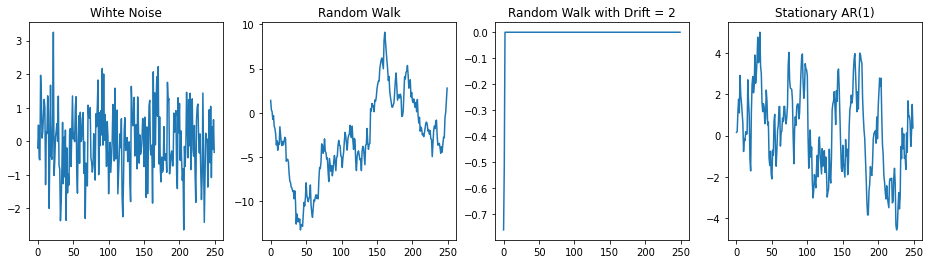

In [4]:
# 백색 잡음 모형, 임의 보행 모형, 표류가 있는 임의 보행 모형,
# 정상성을 만족하는 pi=0.9인 AR(1)모형을 각각 250개씩 샘플을 생성하여 그림
np.random.seed(12345)

white_noise = gen_arma_samples(ar=[1], ma=[1], nobs=250)
# y_t = epsilon_t
# y_{t-1} = 0  /  pi = 0, c = 0
random_walk = gen_arma_samples(ar=[1,-1], ma=[1], nobs=250)
# (1-L)y_t = epsilon_t
# y_t = Ly_{t-1}  /  타임랙 적용  /  ∴ (1-L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250,2)
# y_t = 2 + y_{t-1} + epsilon_t
# c, 즉 드리프트 적용함
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9], ma=[1], nobs=250)
# (1 - 0,9L)y_t = epsilon_t
# -1 < pi < 1 인 y_t = c + pi_1*y_{t-1} + epsilon_t

fig, ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("Wihte Noise", fontsize=12)

ax[1].plot(random_walk)
ax[1].set_title("Random Walk", fontsize=12)

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with Drift = 2")

ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")

fig.set_size_inches(16, 4)

plt.show()

MA - 이동평균모형
---
* 회귀에서 목표 예상 변수(forecast variable)의 과거 값을 이용하는 대신에, 이동 평균 모델은 회귀처럼 보이는 모델에서 과거 예측 오차(forecast error)을 이용함.   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y_t=c+ε_t+θ_1ε_{t−1}+θ_2ε_{t−2}+⋯+θ_qε_{t−q}$,    
여기에서 $ε_t$ 는 백색잡음. $q$차 이동 평균 모델인 MA($q$) 모델. 물론, εt 의 값을 관찰하지 않기 때문에, 이것은 실제로는 보통 생각하는 회귀가 아님.
* $θ_1$의 값에 따라 다른 시계열 패턴이 나타남.

### statsmodles를 이용한 MA 모형 구현
* ArmaProcess(ar=[1] ma=[$1, \theta_1, \theta_2, ..., \theta_q$]) 로 생성

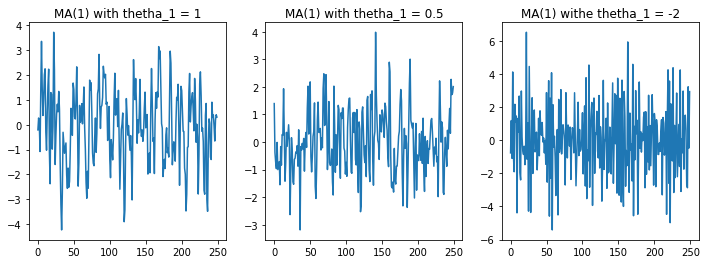

In [5]:
np.random.seed(12345)

ma_1 = gen_arma_samples(ar = [1], ma = [1, 1], nobs = 250)
# y_t = (1+L)epsilon_t
ma_2 = gen_arma_samples(ar = [1], ma = [1, 0.5], nobs = 250)
# y_t = (1+0.5L)epsilon_t
ma_3 = gen_arma_samples(ar = [1], ma = [1, -2], nobs = 250)
# y_t = (1-2L)epsilon_t

fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].plot(ma_1)
ax[0].set_title("MA(1) with thetha_1 = 1")
# MA(1) 모형의 theta 값만 변화

ax[1].plot(ma_2)
ax[1].set_title("MA(1) with thetha_1 = 0.5")

ax[2].plot(ma_3)
ax[2].set_title("MA(1) withe thetha_1 = -2")

plt.show()

### AR 모형과 MA 모형을 언제 사용해야 하는지
<img src="C:\Users\user\Desktop\Vocational_Training\FinTech\Identification ARIMA model.jpg" width="40%">

ARIMA 모형
---
* Auto-regressive Integrated Moving Average Model
* AR과 MA모형을 결합한 ARMA 모형을 일반화한 것.
* ARMA 모델이 안정적 시계열(Stationary Series)에만 적용 가능한 것에 비해, 분석 대상이 다소 비안정적인 시계열(Non Stationary Series)의 특징을 보여도 적용이 가능.
* 안정적인 시계열이란 시간의 추이와 관계없이 평균 및 분산이 불변하거나 시점 간의 공분산이 기준시점과 무관한 형태의 시계열.    
시계열이 안정적이지 않을 때는 로그를 이용하거나 차분을 통해 시계열을 안정적으로 변환한 뒤에 분석을 진행.
* $X_t−ϕ_1X_{t−1}−⋯−ϕ_pX_{t−p}=Z_t+θ_1Z_{t−1}+⋯+θ_qZ_{t−q},  (t=0,±1,±2,⋯)$
* $X_t$은 ARIMA를 통해 예측하고자 하는 데이터이고 $Z_t$은 백색잡음(White Noise)으로, 모두 독립적이고 동일하게 분산된(IID) 확률 변수.

### pmdarima의 auto_arima 라이브러리
* pmdarima.arima.auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)

<details>
<summary> Parameters 펼치기/접기</summary>
<div markdown="1">

**y**  : array-like or iterable, shape=(n_samples,)

> The time-series to which to fit the  `ARIMA`  estimator. This may either be a Pandas  `Series`  object (statsmodels can internally use the dates in the index), or a numpy array. This should be a one-dimensional array of floats, and should not contain any  `np.nan`  or  `np.inf`  values.

**X**  : array-like, shape=[n_obs, n_vars], optional (default=None)

> An optional 2-d array of exogenous variables. If provided, these variables are used as additional features in the regression operation. This should not include a constant or trend. Note that if an  `ARIMA`  is fit on exogenous features, it must be provided exogenous features for making predictions.

**start_p**  : int, optional (default=2)

> The starting value of  `p`, the order (or number of time lags) of the auto-regressive (“AR”) model. Must be a positive integer.

**d**  : int, optional (default=None)

> The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the  `test`  (i.e., either the Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or the Phillips–Perron test will be conducted to find the most probable value). Must be a positive integer or None. Note that if  `d`  is None, the runtime could be significantly longer.

**start_q**  : int, optional (default=2)

> The starting value of  `q`, the order of the moving-average (“MA”) model. Must be a positive integer.

**max_p**  : int, optional (default=5)

> The maximum value of  `p`, inclusive. Must be a positive integer greater than or equal to  `start_p`.

**max_d**  : int, optional (default=2)

> The maximum value of  `d`, or the maximum number of non-seasonal differences. Must be a positive integer greater than or equal to  `d`.

**max_q**  : int, optional (default=5)

> The maximum value of  `q`, inclusive. Must be a positive integer greater than  `start_q`.

**start_P**  : int, optional (default=1)

> The starting value of  `P`, the order of the auto-regressive portion of the seasonal model.

**D**  : int, optional (default=None)

> The order of the seasonal differencing. If None (by default, the value will automatically be selected based on the results of the  `seasonal_test`. Must be a positive integer or None.

**start_Q**  : int, optional (default=1)

> The starting value of  `Q`, the order of the moving-average portion of the seasonal model.

**max_P**  : int, optional (default=2)

> The maximum value of  `P`, inclusive. Must be a positive integer greater than  `start_P`.

**max_D**  : int, optional (default=1)

> The maximum value of  `D`. Must be a positive integer greater than  `D`.

**max_Q**  : int, optional (default=2)

> The maximum value of  `Q`, inclusive. Must be a positive integer greater than  `start_Q`.

**max_order**  : int, optional (default=5)

> Maximum value of p+q+P+Q if model selection is not stepwise. If the sum of  `p`  and  `q`  is >=  `max_order`, a model will  _not_  be fit with those parameters, but will progress to the next combination. Default is 5. If  `max_order`  is None, it means there are no constraints on maximum order.

**m**  : int, optional (default=1)

> The period for seasonal differencing,  `m`  refers to the number of periods in each season. For example,  `m`  is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. Note that if  `m`  == 1 (i.e., is non-seasonal),  `seasonal`  will be set to False. For more information on setting this parameter, see  [Setting m](https://alkaline-ml.com/pmdarima/tips_and_tricks.html#period).

**seasonal**  : bool, optional (default=True)

> Whether to fit a seasonal ARIMA. Default is True. Note that if  `seasonal`  is True and  `m`  == 1,  `seasonal`  will be set to False.

**stationary**  : bool, optional (default=False)

> Whether the time-series is stationary and  `d`  should be set to zero.

**information_criterion**  : str, optional (default=’aic’)

> The information criterion used to select the best ARIMA model. One of  `pmdarima.arima.auto_arima.VALID_CRITERIA`, (‘aic’, ‘bic’, ‘hqic’, ‘oob’).

**alpha**  : float, optional (default=0.05)

> Level of the test for testing significance.

**test**  : str, optional (default=’kpss’)

> Type of unit root test to use in order to detect stationarity if  `stationary`  is False and  `d`  is None. Default is ‘kpss’ (Kwiatkowski–Phillips–Schmidt–Shin).

**seasonal_test**  : str, optional (default=’ocsb’)

> This determines which seasonal unit root test is used if  `seasonal`  is True and  `D`  is None. Default is ‘OCSB’.

**stepwise**  : bool, optional (default=True)

> Whether to use the stepwise algorithm outlined in Hyndman and Khandakar (2008) to identify the optimal model parameters. The stepwise algorithm can be significantly faster than fitting all (or a  `random`  subset of) hyper-parameter combinations and is less likely to over-fit the model.

**n_jobs**  : int, optional (default=1)

> The number of models to fit in parallel in the case of a grid search (`stepwise=False`). Default is 1, but -1 can be used to designate “as many as possible”.

**start_params**  : array-like, optional (default=None)

> Starting parameters for  `ARMA(p,q)`. If None, the default is given by  `ARMA._fit_start_params`.

**method**  : str, optional (default=’lbfgs’)

> The  `method`  determines which solver from  `scipy.optimize`  is used, and it can be chosen from among the following strings:
> 
> -   ‘newton’ for Newton-Raphson
> -   ‘nm’ for Nelder-Mead
> -   ‘bfgs’ for Broyden-Fletcher-Goldfarb-Shanno (BFGS)
> -   ‘lbfgs’ for limited-memory BFGS with optional box constraints
> -   ‘powell’ for modified Powell’s method
> -   ‘cg’ for conjugate gradient
> -   ‘ncg’ for Newton-conjugate gradient
> -   ‘basinhopping’ for global basin-hopping solver
> 
> The explicit arguments in  `fit`  are passed to the solver, with the exception of the basin-hopping solver. Each solver has several optional arguments that are not the same across solvers. These can be passed as  [**](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html#id1)fit_kwargs

**trend**  : str or None, optional (default=None)

> The trend parameter. If  `with_intercept`  is True,  `trend`  will be used. If  `with_intercept`  is False, the trend will be set to a no- intercept value.

**maxiter**  : int, optional (default=50)

> The maximum number of function evaluations. Default is 50.

**offset_test_args**  : dict, optional (default=None)

> The args to pass to the constructor of the offset (`d`) test. See  `pmdarima.arima.stationarity`  for more details.

**seasonal_test_args**  : dict, optional (default=None)

> The args to pass to the constructor of the seasonal offset (`D`) test. See  `pmdarima.arima.seasonality`  for more details.

**suppress_warnings**  : bool, optional (default=True)

> Many warnings might be thrown inside of statsmodels. If  `suppress_warnings`  is True, all of the warnings coming from  `ARIMA`  will be squelched. Note that this will not suppress UserWarnings created by bad argument combinations.

**error_action**  : str, optional (default=’warn’)

> If unable to fit an  `ARIMA`  for whatever reason, this controls the error-handling behavior. Model fits can fail for linear algebra errors, convergence errors, or any number of problems related to stationarity or input data.
> 
> > -   ‘warn’: Warns when an error is encountered (default)
> > -   ‘raise’: Raises when an error is encountered
> > -   ‘ignore’: Ignores errors (not recommended)
> > -   ‘trace’: Logs the entire error stacktrace and continues the
> >     
> >     search. This is the best option when trying to determine why a model is failing.
> >     

**trace**  : bool or int, optional (default=False)

> Whether to print status on the fits. A value of False will print no debugging information. A value of True will print some. Integer values exceeding 1 will print increasing amounts of debug information at each fit.

**random**  : bool, optional (default=False)

> Similar to grid searches,  `auto_arima`  provides the capability to perform a “random search” over a hyper-parameter space. If  `random`  is True, rather than perform an exhaustive search or  `stepwise`  search, only  `n_fits`  ARIMA models will be fit (`stepwise`  must be False for this option to do anything).

**random_state**  : int, long or numpy  `RandomState`, optional (default=None)

> The PRNG for when  `random=True`. Ensures replicable testing and results.

**n_fits**  : int, optional (default=10)

> If  `random`  is True and a “random search” is going to be performed,  `n_iter`  is the number of ARIMA models to be fit.

**return_valid_fits**  : bool, optional (default=False)

> If True, will return all valid ARIMA fits in a list. If False (by default), will only return the best fit.

**out_of_sample_size**  : int, optional (default=0)

> The  `ARIMA`  class can fit only a portion of the data if specified, in order to retain an “out of bag” sample score. This is the number of examples from the tail of the time series to hold out and use as validation examples. The model will not be fit on these samples, but the observations will be added into the model’s  `endog`  and  `exog`  arrays so that future forecast values originate from the end of the endogenous vector.
> 
> For instance:
> 
> y = [0, 1, 2, 3, 4, 5, 6]
> out_of_sample_size = 2
> 
> > Fit on: [0, 1, 2, 3, 4]
> > Score on: [5, 6]
> > Append [5, 6] to end of self.arima_res_.data.endog values

**scoring**  : str, optional (default=’mse’)

> If performing validation (i.e., if  `out_of_sample_size`  > 0), the metric to use for scoring the out-of-sample data. One of (‘mse’, ‘mae’)

**scoring_args**  : dict, optional (default=None)

> A dictionary of key-word arguments to be passed to the  `scoring`  metric.

**with_intercept**  : bool or str, optional (default=”auto”)

> Whether to include an intercept term. Default is “auto” which behaves like True until a point in the search where the sum of differencing terms will explicitly set it to True or False.

**sarimax_kwargs**  : dict or None, optional (default=None)

> Keyword arguments to pass to the ARIMA constructor.

****fit_args**  : dict, optional (default=None)

> A dictionary of keyword arguments to pass to the  [`ARIMA.fit()`](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ARIMA.html#pmdarima.arima.ARIMA.fit "pmdarima.arima.ARIMA.fit")  method.

</div>
</details>

</br>

### 실습

In [6]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import ndiffs
import pmdarima as pm

In [7]:
df_krx = fdr.StockListing("KRX")
symbol = df_krx[df_krx["Name"] == "삼성전자"]["Symbol"]

In [8]:
SSEL = fdr.DataReader(''.join(symbol.values), '2020-01-01', "2021-12-31")

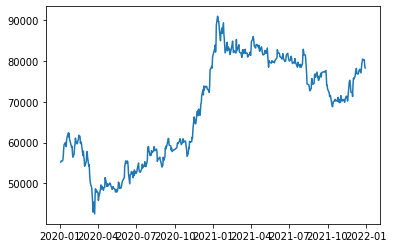

In [9]:
plt.plot(SSEL["Close"])

<AxesSubplot:xlabel='Date'>

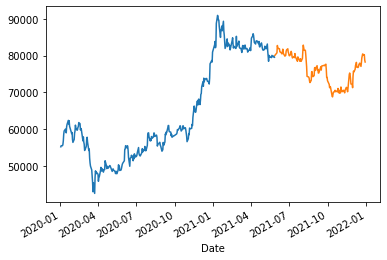

In [10]:
# 학습 데이터와 테스트 데이터 분할
y_train = SSEL["Close"][:int(0.7*len(SSEL))]
y_test = SSEL["Close"][int(0.7*len(SSEL)):]
y_train.plot()
y_test.plot()

In [11]:
# 차분 차수 찾는 라이브러리
kpss_diffs = ndiffs(y_train, alpha=0.05, test="kpss", max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test="adf", max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"적정 차분 차수 : {n_diffs}")

적정 차분 차수 : 1


In [12]:
# 최적모형 탐색
model = pm.auto_arima(y=y_train,
            d =1,
            start_p=0,
            max_p=3,
            start_q=0,
            max_q=3,
            seasonal=False,
            stepwise=True,
            trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5890.906, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5892.850, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5892.866, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5890.105, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5894.864, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.164 seconds


In [13]:
# 모형에 데이터 학습
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# 예측
y_pred = model.predict(n_periods=len(y_test))
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=["Prediction"])
y_pred_df

,Prediction
Date,
2021-05-28,79600.0
2021-05-31,79600.0
2021-06-01,79600.0
2021-06-02,79600.0
2021-06-03,79600.0
...,...
2021-12-24,79600.0
2021-12-27,79600.0
2021-12-28,79600.0


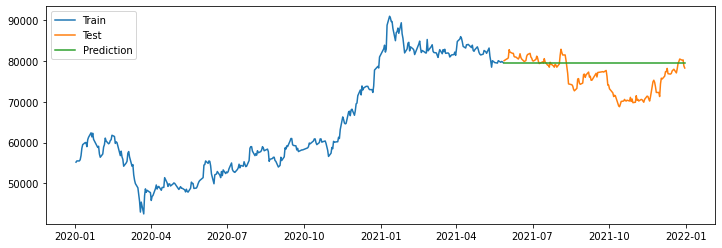

In [15]:
fig, axs = plt.subplots(figsize=(12,4))

plt.plot(y_train, label="Train")

plt.plot(y_test, label="Test")

plt.plot(y_pred_df, label="Prediction")

plt.legend()
plt.show()

In [16]:
# 함수 설정
def forecast_one_step() :
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)

    return (fc.tolist()[0], np.asarray(conf_int).tolist()[0])

In [17]:
forecast_one_step()

(79600.0, [77251.89428339618, 81948.10571660382])

In [18]:
# y_test 내의 데이터 하나하나씩 예측하여 정확도 높여줌
forecast_list = []
y_pred_list = []
pred_upper = [] 
pred_lower = [] 

for i in y_test :
    fc, conf = forecast_one_step()
    y_pred_list.append(fc)      # 예측치
    pred_upper.append(conf[1])  # 신뢰구간 상방
    pred_lower.append(conf[0])  # 신뢰구간 하방

    model.update(i)

y_pred_list

[79600.0,
 80100.0,
 80500.0,
 80600.0,
 80800.0,
 82800.0,
 82200.0,
 81900.0,
 81900.0,
 81100.0,
 81000.0,
 81000.0,
 80500.0,
 80900.0,
 81800.0,
 80900.0,
 80500.0,
 79900.0,
 80000.0,
 80100.0,
 81200.0,
 81600.0,
 81900.0,
 81000.0,
 80700.0,
 80100.0,
 80000.0,
 80400.0,
 81200.0,
 80800.0,
 79900.0,
 79400.0,
 79700.0,
 79800.0,
 79500.0,
 80600.0,
 79800.0,
 79000.0,
 79000.0,
 78500.0,
 79700.0,
 79300.0,
 78800.0,
 78500.0,
 79200.0,
 79000.0,
 78500.0,
 79300.0,
 81400.0,
 82900.0,
 82100.0,
 81500.0,
 81500.0,
 80200.0,
 78500.0,
 77000.0,
 74400.0,
 74200.0,
 73900.0,
 73100.0,
 72700.0,
 73300.0,
 75600.0,
 75700.0,
 74600.0,
 74300.0,
 74600.0,
 76700.0,
 76800.0,
 76000.0,
 76600.0,
 77300.0,
 76100.0,
 76300.0,
 75300.0,
 75300.0,
 76300.0,
 76600.0,
 77000.0,
 76100.0,
 77200.0,
 77400.0,
 77300.0,
 77700.0,
 76300.0,
 74100.0,
 74100.0,
 73200.0,
 72200.0,
 71300.0,
 71600.0,
 71500.0,
 69000.0,
 68800.0,
 69400.0,
 70100.0,
 70200.0,
 70600.0,
 70300.0,
 70200.0,


<AxesSubplot:xlabel='Date'>

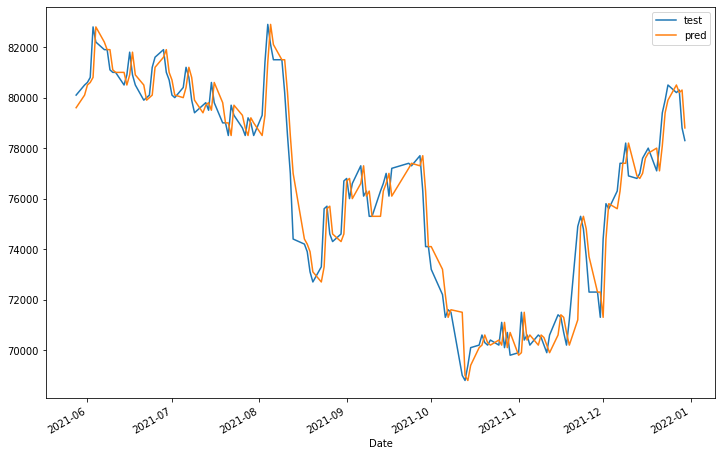

In [19]:
pred_dt = pd.DataFrame({"test" : y_test, "pred" : y_pred_list})
pred_dt.plot(figsize=(12,8))

### plotly를 활용한 시각화

In [20]:
import plotly.graph_objects as go

fig = go.Figure([
    go.Scatter(x=y_train.index, y=y_train, name="Train", mode="lines", line=dict(color="royalblue")),
    # 테스트데이터
    go.Scatter(x=y_test.index, y=y_test, name="Test", mode="lines", line=dict(color="rgba(0,0,30,0.5)")),
    # 예측 데이터
    go.Scatter(x=y_test.index, y=y_pred_list, name="Pred", mode="lines", line=dict(color="red", dash="dot", width=3)),
    # 신뢰구간
    go.Scatter(x=y_test.index.tolist() + y_test.index[::-1].tolist(),
                y=pred_upper + pred_lower[::-1],
                fillcolor="rgba(0,0,30,0.2)",
                fill="toself",
                line={"color":"rgba(0,0,0,0)"},
                hoverinfo="skip",
                showlegend=True)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)")
fig.show()

In [21]:
import plotly.express as px

fig = px.line(pred_dt)
fig.show()